In [48]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

%matplotlib inline

In [103]:
muertes=pd.read_csv("muertes.csv")

C:\Users\ALVAREZ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,8,13,19,23,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [104]:
muertes = muertes.drop(['caudef.descrip'], axis = 1)
muertes.shape

(809296, 30)

In [105]:
Nmuertes = muertes.dropna()
Nmuertes.shape

(351998, 30)

### Gráfico de codo para determinar el número óptimo de Clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 376427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 376427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 376427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 376427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 376427.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3008, cost: 347901.0
Run 1, iteration: 2/100, moves: 220, cost: 347901.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6093, cost: 348132.0
Run 2, ite

Text(0.5, 1.0, 'Método de Codo para el Número óptimo de Clusters K-Modes')

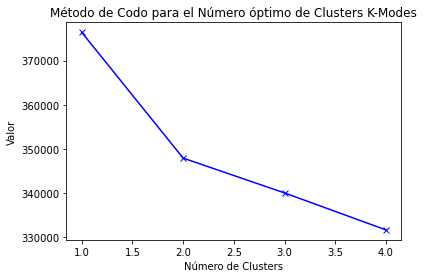

In [57]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init = 5, verbose=1)
    kmode.fit_predict(Nmuertes)
    cost.append(kmode.cost_)

print(K)
print(cost)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor')
plt.title('Método de Codo para el Número óptimo de Clusters K-Modes')

#### El número óptimo de Clusters al según el gráfico de codo es 2

### Construyendo un modelo con 2 Clusters

In [69]:
kmode = KModes(n_clusters=2, init="random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(Nmuertes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3743, cost: 354420.0
Run 1, iteration: 2/100, moves: 365, cost: 354420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3460, cost: 354164.0
Run 2, iteration: 2/100, moves: 566, cost: 354164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7069, cost: 355644.0
Run 3, iteration: 2/100, moves: 2475, cost: 354981.0
Run 3, iteration: 3/100, moves: 408, cost: 354981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1367, cost: 354657.0
Run 4, iteration: 2/100, moves: 32, cost: 354657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4689, cost: 356485.0
Run 5, iteration: 2/100, moves: 1768, cost: 354510.0
Run 5, iteration: 3/10

In [70]:
Variables = ['Id', 'Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu',
       'Areag', 'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif',
       'Puedif', 'Ecidif', 'Escodif', 'Ciuodif', 'Pnadif', 'Dnadif',
       'Mnadif', 'Nacdif', 'Predif', 'Dredif', 'Mredif', 'Caudef',
       'caudef.descrip', 'Asist', 'Ocur', 'Cerdef']

In [80]:
Nmuertes.insert(0, "Cluster", clusters, True)

In [81]:
Nmuertes

,Cluster,Unnamed: 0,Id,Depreg,Mupreg,Mesreg,Añoreg,Depocu,Mupocu,Areag,...,Mnadif,Nacdif,Predif,Dredif,Mredif,Caudef,caudef.descrip,Asist,Ocur,Cerdef
587662,1,587662,587662,sololá,sololá,septiembre,2013.0,Sololá,Sololá,Rural,...,Sololá,Guatemala,Guatemala,Sololá,Sololá,R040,Epistaxis,Ninguna,Domicilio,Ignorado
587663,1,587663,587663,chiquimula,camotán,julio,2013.0,Chiquimula,Camotán,Rural,...,Camotán,Guatemala,Guatemala,Chiquimula,Camotán,R040,Epistaxis,Ninguna,Domicilio,Ignorado
587664,0,587664,587664,guatemala,guatemala,mayo,2013.0,Guatemala,Guatemala,Urbano,...,Guatemala,Guatemala,Guatemala,Guatemala,Guatemala,R042,Hemoptisis,Médica,Domicilio,Médico
587665,0,587665,587665,chimaltenango,chimaltenango,diciembre,2013.0,Chimaltenango,Chimaltenango,Urbano,...,Guatemala,Guatemala,Guatemala,Chimaltenango,Chimaltenango,R048,Hemorragia de otros sitios de las vías respira...,Médica,Hospital público,Médico
587666,0,587666,587666,suchitepequez,san antonio suchitepéquez,julio,2013.0,Suchitepequez,Mazatenango,Urbano,...,San Antonio Suchitepéquez,Guatemala,Ignorado,Ignorado,Ignorado,R048,Hemorragia de otros sitios de las vías respira...,Médica,Hospital público,Médico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664280,0,664280,664280,zacapa,zacapa,abril,2013.0,Zacapa,Zacapa,Urbano,...,Zacapa,Guatemala,Guatemala,Zacapa,Zacapa,Y835,Amputación de miembro(s),Médica,Hospital público,Médico
664281,0,664281,664281,chiquimula,san jacinto,diciembre,2013.0,Guatemala,Guatemala,Urbano,...,San Jacinto,Guatemala,Guatemala,Izabal,Los Amates,Y835,Amputación de miembro(s),Médica,Hospital público,Médico
664282,0,664282,664282,guatemala,guatemala,noviembre,2013.0,Guatemala,Guatemala,Urbano,...,San Diego,Guatemala,Guatemala,Chimaltenango,Chimaltenango,Y835,Amputación de miembro(s),Médica,Seguro social,Médico
664283,0,664283,664283,guatemala,guatemala,enero,2013.0,Guatemala,Guatemala,Urbano,...,Pueblo Nuevo Viñas,Guatemala,Guatemala,Guatemala,Fraijanes,Y835,Amputación de miembro(s),Médica,Hospital público,Médico


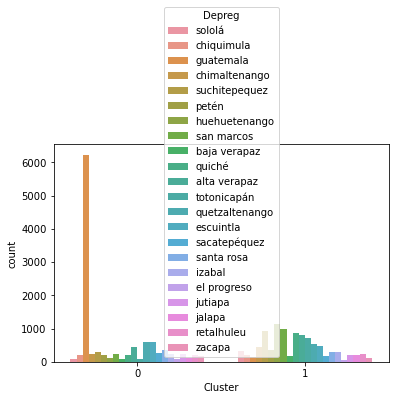

In [91]:
ax = sns.countplot(x="Cluster", hue="Depreg", data=Nmuertes)

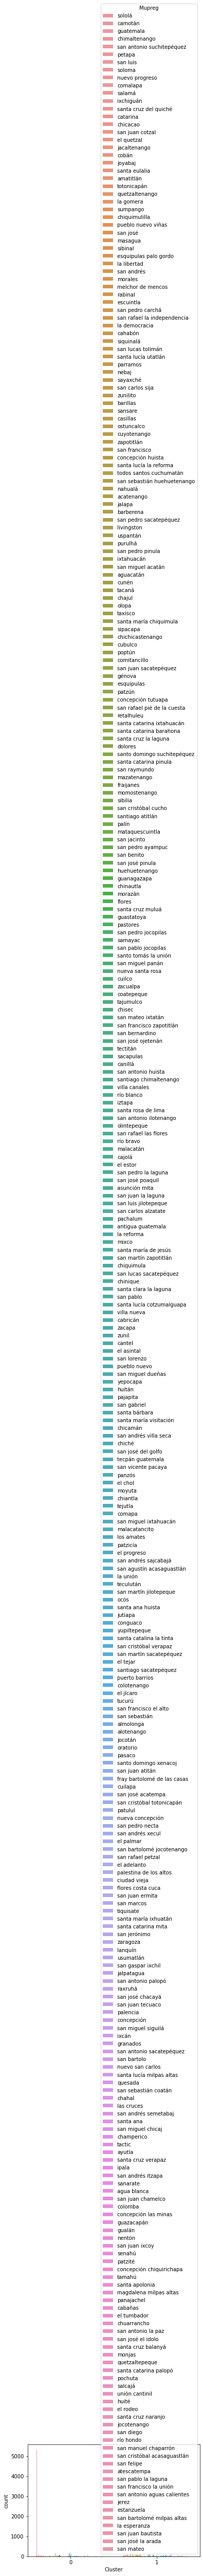

In [92]:
ax = sns.countplot(x="Cluster", hue="Mupreg", data=Nmuertes)

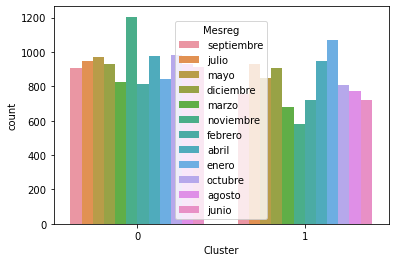

In [88]:
ax = sns.countplot(x="Cluster", hue="Mesreg", data=Nmuertes)

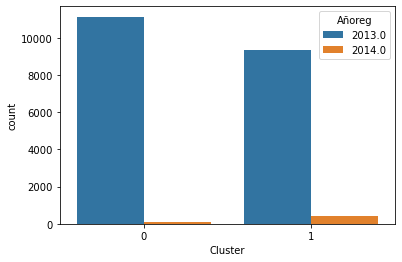

In [93]:
ax = sns.countplot(x="Cluster", hue="Añoreg", data=Nmuertes)

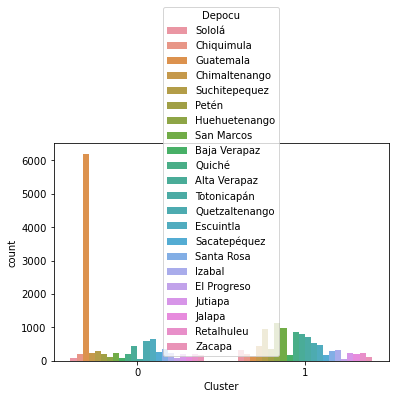

In [94]:
ax = sns.countplot(x="Cluster", hue="Depocu", data=Nmuertes)

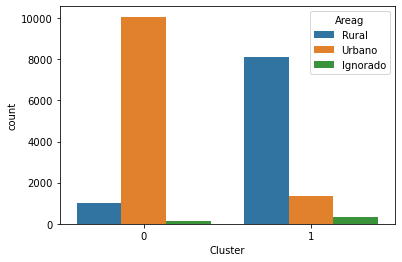

In [95]:
ax = sns.countplot(x="Cluster", hue="Areag", data=Nmuertes)

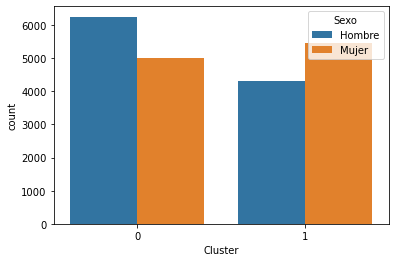

In [96]:
ax = sns.countplot(x="Cluster", hue="Sexo", data=Nmuertes)

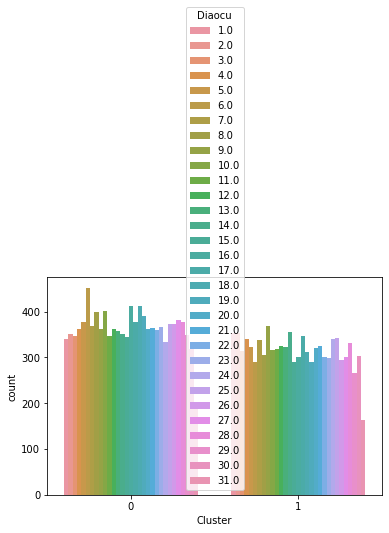

In [97]:
ax = sns.countplot(x="Cluster", hue="Diaocu", data=Nmuertes)

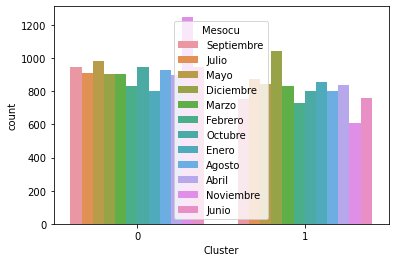

In [98]:
ax = sns.countplot(x="Cluster", hue="Mesocu", data=Nmuertes)

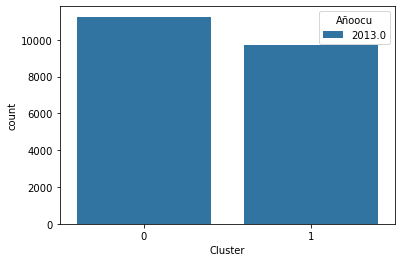

In [100]:
ax = sns.countplot(x="Cluster", hue="Añoocu", data=Nmuertes)